In [61]:
import json
from pathlib import Path

from multiprocessing import Pool
from collections import defaultdict
from nougat.metrics import compute_metrics

/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 2.0.5 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [2]:
index_path = Path('data/rainbow_bank')
add_top_string = '{"primary_language":"en","is_rotation_valid":true,"rotation_correction":0,"is_table":false,"is_diagram":false,"natural_text":"'
add_end_string = '"}'
for filename in Path('results').rglob('texts.json'):
    print(filename)
    dataset = filename.parent.name
    index_file = index_path/(dataset+'.txt')
    model = filename.parent.parent.name
    targets = []
    with open(index_file) as f:
        for line in f:
            index = line.strip()
            tgt = index_path/('mmd_'+model)/(index+'.mmd')
            if model=='olmocr':
                targets.append(add_top_string + tgt.read_text() + add_end_string)
            else:
                targets.append(tgt.read_text())
    d = json.load(filename.open())
    edit, orig = [], []
    for pair in d:
        edit.append(pair['edit'][0])
        orig.append(pair[model][0])

    metrics = defaultdict(list)
    with Pool(128) as p:
        _metrics = p.starmap(compute_metrics, iterable=zip(edit, targets))
        for m in _metrics:
            for key, value in m.items():
                metrics[key].append(value)
        print(model, dataset, 'w/ edit:', {key: sum(values) / len(values) for key, values in metrics.items()})

    metrics = defaultdict(list)
    with Pool(128) as p:
        _metrics = p.starmap(compute_metrics, iterable=zip(orig, targets))
        for m in _metrics:
            for key, value in m.items():
                metrics[key].append(value)
        print(model, dataset, 'w/o edit:', {key: sum(values) / len(values) for key, values in metrics.items()})


results/olmocr/quant_ph/texts.json
olmocr quant_ph w/ edit: {'edit_dist': 0.2570540670256977, 'bleu': 0.5712294563204126, 'meteor': 0.7124170050520345, 'precision': 0.7152218312636611, 'recall': 0.7079469531695719, 'f_measure': 0.7048705634749253}
olmocr quant_ph w/o edit: {'edit_dist': 0.2940556588178717, 'bleu': 0.5734380533578551, 'meteor': 0.6993838041116748, 'precision': 0.735458703466868, 'recall': 0.7125796063510864, 'f_measure': 0.7087918311663552}
results/olmocr/econ/texts.json


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


olmocr econ w/ edit: {'edit_dist': 0.27741178412454326, 'bleu': 0.5848071774863491, 'meteor': 0.7345646908412257, 'precision': 0.7076167028446966, 'recall': 0.7379575341676365, 'f_measure': 0.7124788740466679}


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


olmocr econ w/o edit: {'edit_dist': 0.2812246728556994, 'bleu': 0.5945964492860806, 'meteor': 0.742995696570121, 'precision': 0.725677650827987, 'recall': 0.7608959267330959, 'f_measure': 0.7325350467176273}
results/olmocr/arxiv/texts.json


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contain

olmocr arxiv w/ edit: {'edit_dist': 0.2949993917465187, 'bleu': 0.5327535304618167, 'meteor': 0.6761238856056545, 'precision': 0.671814878145263, 'recall': 0.6797431576185503, 'f_measure': 0.6676265090742298}
olmocr arxiv w/o edit: {'edit_dist': 0.31109073403344223, 'bleu': 0.5414872552580549, 'meteor': 0.6830402131724971, 'precision': 0.6988119161654925, 'recall': 0.6999691660900561, 'f_measure': 0.6886652022991806}
results/kosmos/quant_ph/texts.json
kosmos quant_ph w/ edit: {'edit_dist': 0.3740137140471438, 'bleu': 0.5455054732443626, 'meteor': 0.6167029181787136, 'precision': 0.7943553867585986, 'recall': 0.6718855419958004, 'f_measure': 0.7134668917876693}
kosmos quant_ph w/o edit: {'edit_dist': 0.3848575613627912, 'bleu': 0.5281655569733199, 'meteor': 0.6002451950450817, 'precision': 0.7783467370226094, 'recall': 0.6604797783323813, 'f_measure': 0.6965867002567263}
results/kosmos/econ/texts.json


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contain

kosmos econ w/ edit: {'edit_dist': 0.31206936220499787, 'bleu': 0.60452342677437, 'meteor': 0.7068011402410934, 'precision': 0.7687969366656465, 'recall': 0.7427954226887219, 'f_measure': 0.739050984148}


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contain

kosmos econ w/o edit: {'edit_dist': 0.32032204406360426, 'bleu': 0.5904251043682978, 'meteor': 0.6998302299257372, 'precision': 0.7514641437109711, 'recall': 0.7389518403930376, 'f_measure': 0.726709936774428}
results/kosmos/arxiv/texts.json


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


kosmos arxiv w/ edit: {'edit_dist': 0.38784900550670076, 'bleu': 0.5167583390555457, 'meteor': 0.6007884434594712, 'precision': 0.7379405735547028, 'recall': 0.6444383498905827, 'f_measure': 0.6667621967405177}


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


kosmos arxiv w/o edit: {'edit_dist': 0.3841881705645795, 'bleu': 0.5061952050756131, 'meteor': 0.5906467170927757, 'precision': 0.7241106840659942, 'recall': 0.6345363323380068, 'f_measure': 0.6565125638008797}
results/nougat/quant_ph/texts.json
nougat quant_ph w/ edit: {'edit_dist': 0.3569464899501945, 'bleu': 0.5285058691151986, 'meteor': 0.580770368904994, 'precision': 0.8387121329825618, 'recall': 0.6673344798267008, 'f_measure': 0.7297460943795158}
nougat quant_ph w/o edit: {'edit_dist': 0.3494438307332291, 'bleu': 0.5508411278967579, 'meteor': 0.6011713234839715, 'precision': 0.8638134005632551, 'recall': 0.6888401009626579, 'f_measure': 0.7521726365317281}
results/nougat/econ/texts.json


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contain

nougat econ w/ edit: {'edit_dist': 0.2780672775467042, 'bleu': 0.6258514611594002, 'meteor': 0.7014734442855606, 'precision': 0.8195830709973972, 'recall': 0.7468557995940581, 'f_measure': 0.7629552052334109}


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contain

nougat econ w/o edit: {'edit_dist': 0.28303526748147045, 'bleu': 0.645474681540117, 'meteor': 0.710960799450518, 'precision': 0.8388706851627296, 'recall': 0.759987277064591, 'f_measure': 0.7788128236982621}
results/nougat/arxiv/texts.json


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


nougat arxiv w/ edit: {'edit_dist': 0.3352259584201053, 'bleu': 0.5423800814450848, 'meteor': 0.619065890202103, 'precision': 0.8015721632006548, 'recall': 0.6762242988746352, 'f_measure': 0.7155761140843552}


/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/duan/miniconda3/envs/copylookup/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


nougat arxiv w/o edit: {'edit_dist': 0.34389091153787876, 'bleu': 0.5478216503381621, 'meteor': 0.6169311825821463, 'precision': 0.8227152956834871, 'recall': 0.6757628272375651, 'f_measure': 0.7201762528774958}


In [3]:
for filename in Path('results').rglob('steps.json'):
    model = filename.parent.parent.name
    dataset = filename.parent.name
    d = json.load(filename.open())
    print(model, dataset, 'steps w/ edit:', sum(d['edit'])/len(d['edit']))
    print(model, dataset, 'steps w/o edit:', sum(d[model])/len(d[model]))
    print('saved steps:', (1-sum(d['edit'])/sum(d[model]))*100, '\n')

olmocr quant_ph steps w/ edit: 738.453125
olmocr quant_ph steps w/o edit: 1174.3828125
saved steps: 37.11989675427918 

olmocr econ steps w/ edit: 561.828125
olmocr econ steps w/o edit: 870.0859375
saved steps: 35.428432895457526 

olmocr arxiv steps w/ edit: 766.6953125
olmocr arxiv steps w/o edit: 1148.4765625
saved steps: 33.24240672085983 

kosmos quant_ph steps w/ edit: 511.9765625
kosmos quant_ph steps w/o edit: 911.75
saved steps: 43.84682615848643 

kosmos econ steps w/ edit: 446.2734375
kosmos econ steps w/o edit: 786.6640625
saved steps: 43.27013794404775 

kosmos arxiv steps w/ edit: 555.8828125
kosmos arxiv steps w/o edit: 879.28125
saved steps: 36.77986281408822 

nougat quant_ph steps w/ edit: 607.6328125
nougat quant_ph steps w/o edit: 967.8046875
saved steps: 37.215347233994464 

nougat econ steps w/ edit: 562.171875
nougat econ steps w/o edit: 817.625
saved steps: 31.243311420272136 

nougat arxiv steps w/ edit: 656.2890625
nougat arxiv steps w/o edit: 926.828125
saved

In [4]:
for filename in Path('results').rglob('times.json'):
    model = filename.parent.parent.name
    dataset = filename.parent.name
    d = json.load(filename.open())
    edit_time = sum(d['filter']+d['edit']+d['build']+d['generation'])/len(d['edit'])
    print(model, dataset, 'times w/ edit:', edit_time)
    print(model, dataset, 'times in each module:')
    print('filter:', sum(d['filter'])/len(d['edit']), 'build sequence:', sum(d['build'])/len(d['edit']))
    print('edit action:', sum(d['edit'])/len(d['edit']), 'generation step:', sum(d['generation'])/len(d['edit']))
    no_edit_time = sum(d[model])/len(d[model])
    print(model, dataset, 'times w/o edit:', no_edit_time)
    print('reduced latency:', (1-edit_time/no_edit_time)*100, '\n')

olmocr quant_ph times w/ edit: 22.327076010406017
olmocr quant_ph times in each module:
filter: 0.03444122150540352 build sequence: 0.008349031209945679
edit action: 0.0019782260060310364 generation step: 22.282307531684637
olmocr quant_ph times w/o edit: 35.73091371357441
reduced latency: 37.513279986669325 

olmocr econ times w/ edit: 17.078057050704956
olmocr econ times in each module:
filter: 0.032878436148166656 build sequence: 0.00674055702984333
edit action: 0.0014620404690504074 generation step: 17.036976017057896
olmocr econ times w/o edit: 26.429971273988485
reduced latency: 35.38374721007502 

olmocr arxiv times w/ edit: 22.912947081029415
olmocr arxiv times in each module:
filter: 0.03222963027656078 build sequence: 0.006079293787479401
edit action: 0.0016938913613557816 generation step: 22.87294426560402
olmocr arxiv times w/o edit: 34.47564062476158
reduced latency: 33.538734405496285 

kosmos quant_ph times w/ edit: 6.661782365292311
kosmos quant_ph times in each module:

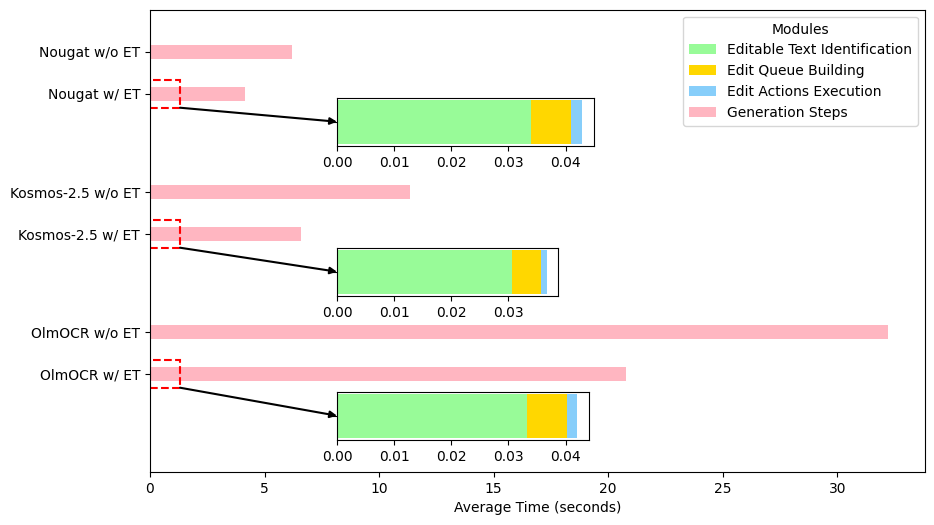

In [60]:
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Reinitialize data
backbones = ['olmocr w/ ET', 'olmocr w/o ET', 'kosmos w/ ET', 'kosmos w/o ET', 'nougat w/ ET', 'nougat w/o ET']
modules = ['Editable Text Identification', 'Edit Queue Building', 'Edit Actions Execution', 'Generation Steps']

# Latency values (redefine since execution state was lost)
olmocr_avg = np.array([0.03318310, 0.00705629, 0.00171139, 20.73074260])
olmocr_avg_wo = np.array([0,0,0, 96.63652561232448/3])

kosmos_avg = np.array([0.03071624, 0.00507193, 0.00102076, 6.53738569])
kosmos_avg_wo = np.array([0,0,0, 34.00868106633425/3])

nougat_avg = np.array([0.03393569, 0.00704410, 0.00191036, 4.10624906])
nougat_avg_wo = np.array([0,0,0, 18.599827095866203/3])

# Stack into an array for plotting
averages = np.array([olmocr_avg, olmocr_avg_wo, kosmos_avg, kosmos_avg_wo, nougat_avg, nougat_avg_wo])


y_positions = np.array([3.5, 3.2, 2.5, 2.2, 1.5, 1.2][::-1])

# Create figure and main axis with thinner bars
fig, ax = plt.subplots(figsize=(10, 6))
bar_height = 0.1  # Reduce bar thickness

# Reset bottom positions
bottom = np.zeros(len(backbones))

# Colors for modules
module_colors = ["#98FB98", "#FFD700", "#87CEFA", "#FFB6C1"] 

# Plot the main stacked bar chart with thinner bars
for i, module in enumerate(modules):
    ax.barh(y_positions, averages[:, i], left=bottom, color=module_colors[i], label=module, height=bar_height)
    bottom += averages[:, i]

# Zoom-in area: focus only on the top left part of the nougat bar
zoom_x = 0.15  # Position of zoom box (rightward shift)
zoom_y = 0.8   # Position of zoom box (upward shift)
zoom_width = 0.2  # Width of zoom box
zoom_height = 0.1  # Height of zoom box

# Coordinates for the zoomed-in area (upper-left part of nougat bar)
zoom_box_x = 3.9
zoom_box_y = 0.85
zoom_box_width = np.sum(averages[4][:3]) * zoom_width * 30 # Width depends on nougat's total time
zoom_box_height = 0.08  # Focuses only on the upper left

# Draw the zoomed-in box
axins = fig.add_axes([zoom_box_x / 5 /  2.5, zoom_box_y / 3 * 2.2 + 0.03, zoom_box_width, zoom_box_height])

# Stacked bar for nougat in zoomed-in box (focusing only on first part)
bottom_zoom = np.zeros(1)
for i, module in enumerate(modules[:3]):  # Only showing first three modules
    axins.barh([' '], averages[4, i], left=bottom_zoom, color=module_colors[i], height=bar_height)
    bottom_zoom += averages[4, i]

# Draw the zoomed-in box
zoom_box_width = np.sum(averages[2][:3]) * zoom_width * 30 # Width depends on nougat's total time
axins1 = fig.add_axes([zoom_box_x / 5 /  2.5, zoom_box_y / 3 * 2.2 - 0.22, zoom_box_width, zoom_box_height])

# Stacked bar for nougat in zoomed-in box (focusing only on first part)
bottom_zoom1 = np.zeros(1)
for i, module in enumerate(modules[:3]):  # Only showing first three modules
    axins1.barh([' '], averages[2, i], left=bottom_zoom1, color=module_colors[i], height=bar_height)
    bottom_zoom1 += averages[2, i]

# Draw the zoomed-in box
zoom_box_width = np.sum(averages[0][:3]) * zoom_width * 30 # Width depends on nougat's total time
axins2 = fig.add_axes([zoom_box_x / 5 /  2.5, zoom_box_y / 3 * 2.2 - 0.46, zoom_box_width, zoom_box_height])

# Stacked bar for nougat in zoomed-in box (focusing only on first part)
bottom_zoom2 = np.zeros(1)
for i, module in enumerate(modules[:3]):  # Only showing first three modules
    axins2.barh([' '], averages[0, i], left=bottom_zoom2, color=module_colors[i], height=bar_height)
    bottom_zoom2 += averages[0, i]

# Add rectangle to highlight the zoomed-in area on the main plot (top left part of nougat bar)
rect = patches.Rectangle(
    (0, 3.2-0.1), np.sum(averages[2]) * zoom_width, 0.2,  # Focus only on top left
    linewidth=1.5, edgecolor='red', facecolor='none', linestyle='dashed'
)
ax.add_patch(rect)
rect = patches.Rectangle(
    (0, 2.2-0.1), np.sum(averages[2]) * zoom_width, 0.2,  # Focus only on top left
    linewidth=1.5, edgecolor='red', facecolor='none', linestyle='dashed'
)
ax.add_patch(rect)
rect = patches.Rectangle(
    (0, 1.2-0.1), np.sum(averages[2]) * zoom_width, 0.2,  # Focus only on top left
    linewidth=1.5, edgecolor='red', facecolor='none', linestyle='dashed'
)
ax.add_patch(rect)

# Draw an arrow from the zoomed-in area to the magnified view
arrow = patches.ConnectionPatch(
    xyA=(np.sum(averages[2]) * zoom_width, 3.1), xyB=(0, 0), coordsA=ax.transData, coordsB=axins.transData,
    arrowstyle="-|>", color="black", linewidth=1.5
)
fig.add_artist(arrow)

# Draw an arrow from the zoomed-in area to the magnified view
arrow1 = patches.ConnectionPatch(
    xyA=(np.sum(averages[2]) * zoom_width, 2.1), xyB=(0, 0), coordsA=ax.transData, coordsB=axins1.transData,
    arrowstyle="-|>", color="black", linewidth=1.5
)
fig.add_artist(arrow1)

arrow2 = patches.ConnectionPatch(
    xyA=(np.sum(averages[2]) * zoom_width, 1.1), xyB=(0, 0), coordsA=ax.transData, coordsB=axins2.transData,
    arrowstyle="-|>", color="black", linewidth=1.5
)
fig.add_artist(arrow2)

# Add x-axis to the zoomed-in part
#axins.set_xlabel("Time (seconds)")
#axins.set_xticks(np.linspace(0, 0.05, 5))  # Adding tick marks
#axins1.set_xticks(np.linspace(0, 0.05, 5))
#axins2.set_xticks(np.linspace(0, 0.05, 5))

# Labels and title
ax.set_xlabel('Average Time (seconds)')
#ax.set_ylabel('Backbone Models')
#ax.set_title('Average Latency Breakdown with Zoom-in on Nougat (Top Left Part)')
ax.legend(title="Modules")
ax.set_ylim(0.5, 3.8)

ax.set_yticks(y_positions)
ax.set_yticklabels(['OlmOCR w/ ET', 'OlmOCR w/o ET', 'Kosmos-2.5 w/ ET', 'Kosmos-2.5 w/o ET', 'Nougat w/ ET', 'Nougat w/o ET'])

plt.savefig("fig1.pdf", bbox_inches='tight')
plt.show()

In [64]:
maxes = {'nougat': 1025, 'kosmos': 1024, 'olmocr':2048}
for filename in Path('results').rglob('steps.json'):
    print(filename)
    dataset = filename.parent.name
    model = filename.parent.parent.name
    d = json.load(filename.open())
    count = 0
    for i in d[model]:
        if i == maxes[model]:
            count += 1
    print(count/len(d[model])*100)

results/olmocr/quant_ph/steps.json
3.90625
results/olmocr/econ/steps.json
1.5625
results/olmocr/arxiv/steps.json
10.15625
results/kosmos/quant_ph/steps.json
62.5
results/kosmos/econ/steps.json
37.5
results/kosmos/arxiv/steps.json
54.6875
results/nougat/quant_ph/steps.json
80.46875
results/nougat/econ/steps.json
43.75
results/nougat/arxiv/steps.json
67.1875
